### $$ Solving \ satisfiability \ problems \ using \ Grover’s \ Algorithm $$

#### $$ Quantum \ Computing \ - \ Final \ project $$

$$ June \ 23, \ 2022 $$

Trabalho realizado pelo $Grupo \ 15$:
* Beatriz  Fernandes  Oliveira, A91640 
* Catarina  Martins  Sá  Quintas, A91650

#### $ Criação \ da \ fórmula \ booleana \ 3-SAT $


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Como primeira tarefa deste trabalho prático, é nos pedida a criação de uma fórmula booleana 3-SAT. Ora, uma fórmula booleana 3-SAT corresponde, tal como um nome diz, a uma fórmula que pode ser satisfeita ou não. Ou seja, caso exista uma atribuição de valores de verdade para as variáveis desta que a tornem verdadeira, então esta é satisfeita. Caso contrário, não o é. Para além disso, uma fórmula 3-SAT tem que conter 3 variáveis em cada claúsula. 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Assim sendo, consideremos a seguinte fórmula, $f$: $$f(v_1,v_2,v_3) = (\neg v_1 \vee \neg v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee v_3) \wedge (v_1 \vee v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee \neg v_3) \wedge (\neg v_1 \vee v_2 \vee v_3) \wedge ( v_1 \vee v_2 \vee v_3) \wedge ( \neg v_1 \vee \neg v_2 \vee v_3)$$ 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Com o intuito de verificar-mos a satisfabilidade da nossa fórmula, vamos testar os diferentes valores lógicos associados às variáveis que a compõem. Para facilitar a vizualização da tabela, vamos nomear as claúsulas da fórmula $f$.
* A =  $v_1 \vee  v_2 \vee  v_3$
* B =  $v_1 \vee \neg v_2 \vee v_3$
* C =  $\neg v_1 \vee \neg v_2 \vee \neg v_3$
* D = $ v_1 \vee \neg v_2 \vee \neg v_3 $
* E = $ v_1 \vee v_2 \vee \neg v_3 $
* F = $ \neg v_1 \vee  v_2 \vee v_3 $
* G = $ \neg v_1 \vee \neg v_2 \vee v_3 $

<img src="imagens/tabela_da_verdade.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="1000 px" align="center">


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pela observação da tabela lógica obtida, podemos concluir que, estamos perante uma fórmula booleana 3-SAT com solução, tal como pretendíamos. 

#### $ Implementação \ do \ Algoritmo \ de \ Grover $

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer
from qiskit.tools.visualization import plot_histogram
import numpy as np

In [5]:
def execute_circuit(qc, shots=1024, decimal=False):
    device = Aer.get_backend('qasm_simulator')
    counts = device.run(qc, shots=shots).result().get_counts()
    
    if decimal:
        counts = dict((int(a[::-1],2),b) for (a,b) in counts.items())
    else:
        counts = dict((a[::-1],b) for (a,b) in counts.items())

    return counts

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O Algoritmo de Grover divide-se em três fases, a $inicialização$, o $oracle$ e o $diffuser$. Para a sua correta implementação, é necessário saber o número de qubits a utilizar. Sabendo que necessitamos de um qubit para cada variável inicial, um qubit para o resultado final e, ainda, um qubit por cada claúsula existente na nossa fórmula, podemos concluir que precisamos, então, de 11 qubits. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Inicializaremos, então, a construção do nosso circuito.  

In [6]:
#Criação do Circuito
n_qubits = 11
qr = QuantumRegister(3)
ancilla = QuantumRegister(8)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr, ancilla)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; No $oracle$ calcula-se o valor de cada claúsula pertencente à fórmula f, incluindo o valor final desta.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Para tal, é necessário verificar se as varíaveis destas estão ou não negadas e, caso não estejam, é lhes aplicada a gate $X$. Posteriormente, aplicamos a gate $multi-cX$ à ancilla em que estamos a trabalhar, seguida da aplicação da negação às variáveis já negadas anteriormente. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Finalmente, aplicamos a gate $multi-cX$ à ancilla referente ao valor da fórmula $f$ e negamos o seu valor. 

In [7]:
def oracle(qr, ancilla):
    qc = QuantumCircuit(qr, ancilla)
    for i in range(0,8):
        if i==0:
            qc.mcx(qr,ancilla[i])
            qc.x(ancilla[i])
        elif i==1:
            qc.x(qr[0])
            qc.x(qr[2])
            qc.mcx(qr,ancilla[i])
            qc.x(ancilla[i])
            qc.x(qr[0])
            qc.x(qr[2])
        elif i==2:
            qc.x(qr[0])
            qc.x(qr[1])
            qc.mcx(qr,ancilla[i])
            qc.x(ancilla[i])
            qc.x(qr[0])
            qc.x(qr[1])
        elif i==3:
            qc.x(qr[0])
            qc.mcx(qr,ancilla[i])
            qc.x(ancilla[i])
            qc.x(qr[0])
        elif i==4:
            qc.x(qr[1])
            qc.x(qr[2])
            qc.mcx(qr,ancilla[i])
            qc.x(ancilla[i])
            qc.x(qr[1])
            qc.x(qr[2])
        elif i==5:
            qc.x(qr[0])
            qc.x(qr[1])
            qc.x(qr[2])
            qc.mcx(qr,ancilla[i])
            qc.x(ancilla[i])
            qc.x(qr[0])
            qc.x(qr[1])
            qc.x(qr[2])
        elif i==6:
            qc.x(qr[2])
            qc.mcx(qr,ancilla[i])
            qc.x(ancilla[i])
            qc.x(qr[2])
    qc.mcx(ancilla[:-1], ancilla[-1])
    qc.x(ancilla[-1])

    qc.barrier()
    return qc

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A fase de $amplificação/diffuser$ serve para amplificar a probabilidade de obter a solução espectável, diminuindo as restantes probablidades. 

In [8]:
def diffusion_operator(qr, ancilla):
    qc = QuantumCircuit(qr,ancilla)

    qc.h(qr)
    qc.x(qr)
    qc.h(qr[-1])

    qc.mcx(qr[:-1],qr[-1])
    
    qc.h(qr[-1])
    qc.x(qr)
    qc.h(qr)

    qc.barrier()
    
    return qc 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Portanto, iremos inicializar todos os estados com a mesma amplitude, isto é, inicializar todos os qubits com uma gate de Hadammar.

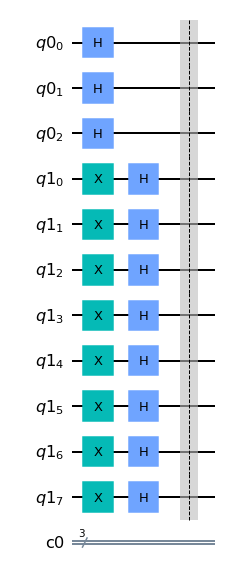

In [9]:
# Sobreposição uniforme
qc.h(qr)

# |-> inicializar
qc.x(ancilla)
qc.h(ancilla)

qc.barrier()

qc.draw(output="mpl")

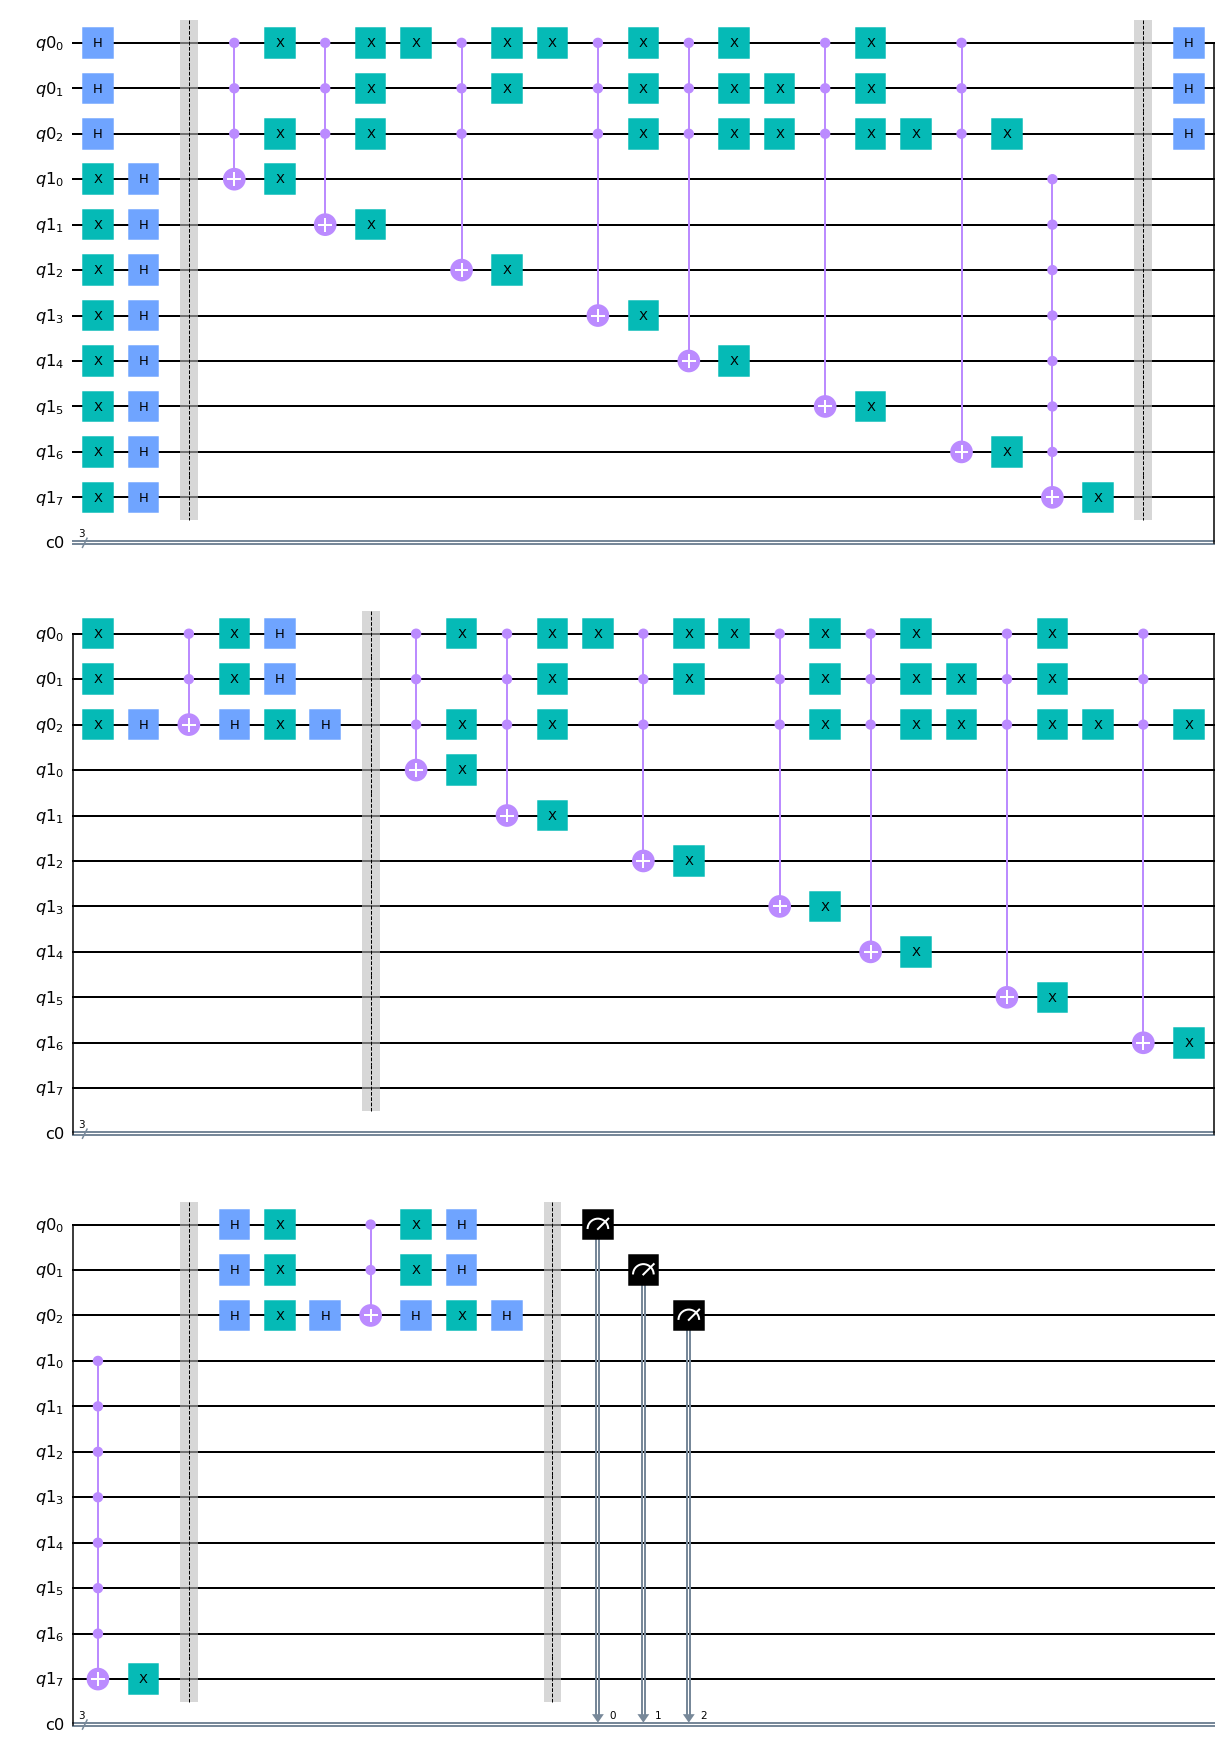

In [7]:
elements = 2**3
iterations= int(np.floor(np.pi/4 * np.sqrt(elements)))

for j in range(iterations):
    qc = qc.compose(oracle(qr,ancilla))
    qc = qc.compose(diffusion_operator(qr,ancilla))


qc.measure(qr,cr)
qc.draw(output="mpl")

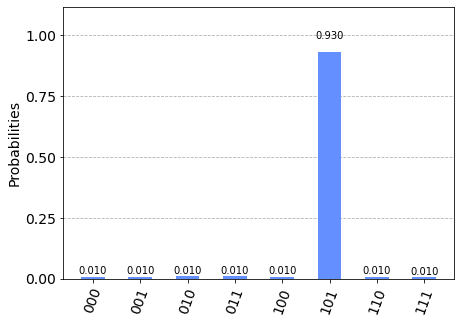

In [8]:
counts = execute_circuit(qc,shots=100000)
plot_histogram(counts)

#### $Solução\ obtida \ apenas \ com \ 1 \ iteração$

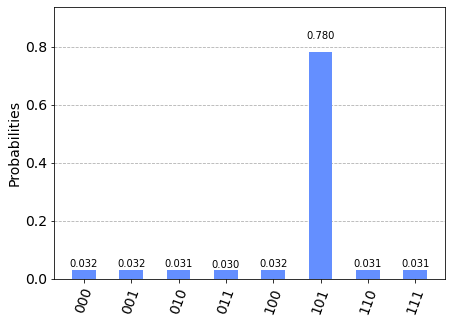

In [10]:
qc = qc.compose(oracle(qr,ancilla))
qc = qc.compose(diffusion_operator(qr,ancilla))


qc.measure(qr,cr)
qc.draw(output="mpl")

counts = execute_circuit(qc,shots=100000)
plot_histogram(counts)

#### $Solução\ obtida \ com \ 3 \ iterações$

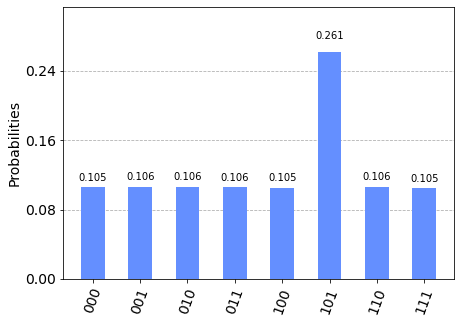

In [11]:
for j in range(3):
    qc = qc.compose(oracle(qr,ancilla))
    qc = qc.compose(diffusion_operator(qr,ancilla))


qc.measure(qr,cr)
qc.draw(output="mpl")

counts = execute_circuit(qc,shots=100000)
plot_histogram(counts)

#### $Análise \ crítica \ dos \ resultados \ obtidos$ 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A partir de múltiplas execuções do nosso circuito, foi possível obter o primeiro gráfico que se encontra acima. Este gráfico dá-nos que a probabilidade de obtermos a solução correta, ou seja, a probabilidade de obtenção do valor 101, que é de cerca 93%. Existindo, assim, para as 100000 amostras recolhidas, apenas 7% de erro. 
Apesar de, tal como sabemos, esta probabilidade puder variar, consoante o número de vezes que executamos este circuito, consideramos que a solução obtida tem um elevado grau de exatidão.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;O número ideal de iterações do Algoritmo de Grover para obter uma solução da nossa implementação é dado por:
$$  \lfloor \frac{\pi}{4} * \sqrt(elements) \rfloor $$
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ora, pela observação dos dois últimos gráficos acima, podemos concluir que o número de iterações ideal é de duas iterações. No entanto, com o intuito de validar essa nossa afirmação, iremos verificar, através da fórmula anterior, qual o valor real do mesmo. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Temos que o nosso número de elementos é de 8, pelo que o número ideal de iterações corresponde a uma iteração, tal como tínhamos verificado. 
Tal como foi lecionado nas aulas, a complexidade do Algortimo de Grover é de $O(\sqrt N)$. 

#### $ Conclusão $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Em suma, consideramos que a realização deste projeto foi bastante vantajosa, uma vez que não só nos possibilitou uma melhor consolidação dos tópicos abordados nas aulas, como também permitiu-nos aplicar esses conhecimentos numa aplicação diferente da habitual. Julgamos, ainda, ter cumprido os objetivos propostos. 


#### $Referências$
* Satisfiability with Grover - https://qiskit.org/textbook/ch-applications/satisfiability-grover.html
* Grover’s algorithm - Qiskit - https://qiskit.org/textbook/ch-algorithms/grover.html
* Qskit Documentacion - https://qiskit.org/documentation/stable/0.26/index.html
* Aulas - http://arca.di.uminho.pt/ic-2122/ 